<a href="https://colab.research.google.com/github/mwelland/ENGPHYS_3NM4/blob/main/Assignments/Assignment_6_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment **
Due: Thursday Nov 7th EOD

# Q1

You are calculating the temperature profile in an nuclear plate fuel that is 1mm thick; much thinner than the other dimensions. In a 1D model through the thickness, the temperature obeys the Fourier heat balance law with a heat source:

$$ \nabla \cdot \lambda \nabla T = -Q $$

The boundary conditions are $T=300$ on all outer surfaces.


## 1a


 Write the finite difference scheme for Fourier heat balance equation.

 {answer}

$$\frac{\partial^2 T(n)}{\partial x ^2} = \frac{T_{n -1} - 2 T_n + T_{n+1}}{h^2}$$

Substitute:
$$\begin{align}
\lambda \frac{\partial^2 T(n)}{\partial x ^2}&= -Q \\
\lambda \frac{T_{n -1} - 2 T_n + T_{n+1}}{h^2}&= -Q \\
T_{n -1} - 2 T_n + T_{n+1}&=-\frac{Q h^2}{\lambda}
\end{align}
$$

## 1b

Assuming $Q = 1 kW/m^3$, and $\lambda = 2\frac{mW}{m \cdot K}$, use the finite difference method to find a solution with step size $10  \mu m$

{implementation, answer}`

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[ 3.e+02 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05 -5.e-05
 -5.e

<ipython-input-1-cb2c33061824>:34: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  T = sp.sparse.linalg.spsolve(A, b)


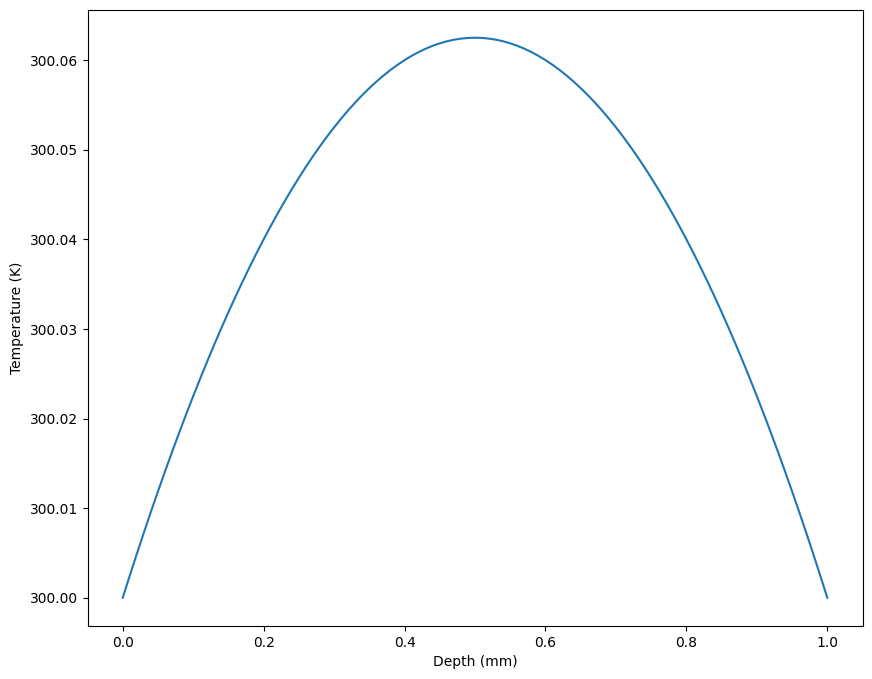

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Build matricies
def get_A_and_b(n, h, Q, lam):

  # Get A
  A = np.zeros((n+1, n+1))
  A[0, 0] = 1
  A[n, n] = 1
  for i in range(1, n):
      A[i, i-1] = 1
      A[i, i] = -2
      A[i, i+1] = 1

  # Get b
  b = np.zeros(n+1)
  b[0] = 300
  b[1:-1] = -Q*h**2/lam
  b[-1] = 300

  return A,b

h = 1e-5 #mm

n = int(.001/h)

A,b = get_A_and_b(n=n, h = h, Q = 1000, lam = .002)

print(A)
print(b)

T = sp.sparse.linalg.spsolve(A, b)

x = np.linspace(0, 1, n+1)
plt.figure(figsize=(10,8))
plt.plot(x, T)
plt.xlabel('Depth (mm)')
plt.ylabel('Temperature (K)')
plt.show()

## 1c

Write the Finite Difference formula if $\lambda = 2 + \frac{T}{300} \quad \frac{mW}{m \cdot K}$

{answer}

$$\begin{align}
\frac{d}{d x} \bigg[2+\frac{T}{300}\bigg] \frac{d T}{d x} &= -Q \\
\frac{1}{300} T'^2 + \bigg[2 + \frac{T}{300}\bigg] T'' &= -Q \\
\end{align}$$


which in finite difference is:
$$\frac{1}{1200 h^2}  (T_{i+1} - T_{i-1})^2 + \bigg[2 + \frac{T_i}{300}\bigg] \frac{T_{i+1} - 2T_i + T_{i-1}}{h^2} = -Q$$

## 1d

{Implementation, answer}

 Solve for T with the temperature dependent thermal conductivity

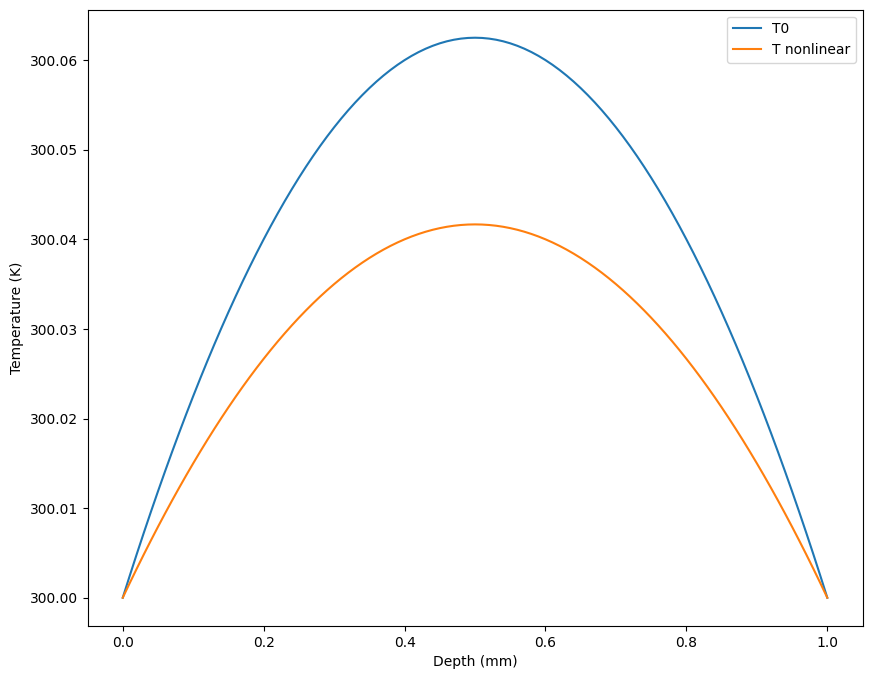

In [ ]:
from scipy.optimize import root
T0 = T #Solution from above

def residual(T, h, Q):
  """Calculates the residual of the finite difference equation.

  Args:
    T: The temperature vector.
    h: The step size.
    Q: The heat source.
  """
  n = len(T)
  r = np.zeros(n)
  for i in range(1, n - 1):
    r[i] = (1e-3/(1200 * h**2)) * (T[i+1] - T[i-1])**2 + (2 + T[i]*1/300)*1e-3 * (T[i+1] - 2*T[i] + T[i-1]) / h**2 + Q
  r[0] = T[0] - 300  # Boundary condition
  r[-1] = T[-1] - 300  # Boundary condition
  return r

sol = root(residual, T0, args=(h, 1000))

x = np.linspace(0, 1, n+1)
plt.figure(figsize=(10,8))
plt.plot(x, T0, label="T0")
plt.plot(x, sol.x, label = "T nonlinear")
plt.legend()
plt.xlabel('Depth (mm)')
plt.ylabel('Temperature (K)')
plt.show()


## Bonus

Could you have used the method of solution of 1d to solve 1b (without any prior knowledge?)

{answer}

Yes! The linear system is a subset of the nonlinear system and can be solved using the same tools. You wouldn't have the initial guess though, but in this case it would still converge.

#Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

## 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

In [ ]:
import numpy as np
from scipy.integrate import quad

def calculate_fourier_coefficients(f, n):
    """Calculates the nth Fourier coefficients for a given function."""

    def integrand_a(x, n):
        return f(x) * np.cos(n * x)

    def integrand_b(x, n):
        return f(x) * np.sin(n * x)

    A_n, _ = quad(integrand_a, -np.pi, np.pi, args=(n))
    B_n, _ = quad(integrand_b, -np.pi, np.pi, args=(n))

    A_n /= np.pi
    B_n /= np.pi

    return A_n, B_n

def calculate_fourier_series(f, n):
  """ Calculates the n-th Fourier series for a given function. """
  A_n = []
  B_n = []
  for i in range(n+1):  # Mind the range to n+1! This accounts for the zero in the range() function
    AB = calculate_fourier_coefficients(f, i)
    A_n.append(AB[0])
    B_n.append(AB[1])
    print(f"A_{i}: {AB[0]:.10f}, B_{i}: {AB[1]:.10f}")
  return A_n, B_n

def find_and_plot_fourier_series(f, n):
    """Plots the original function and its Fourier series approximation."""
    x = np.linspace(-np.pi, np.pi, 200)
    y = f(x)

    A_n, B_n = calculate_fourier_series(f, n)

    y_approx = A_n[0] / 2
    for i in range(1, n + 1):
        y_approx += A_n[i] * np.cos(i * x) + B_n[i] * np.sin(i * x)

    plt.plot(x, y, label='Original Function')
    plt.plot(x, y_approx, label=f'Fourier Series (n={n})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Fourier Series Approximation')
    plt.legend()
    plt.show()

A_0: 0.0000000000, B_0: 0.0000000000
A_1: 2.0000000000, B_1: -0.0000000000
A_2: 0.0000000000, B_2: 0.0000000000
A_3: 0.0000000000, B_3: 1.0000000000


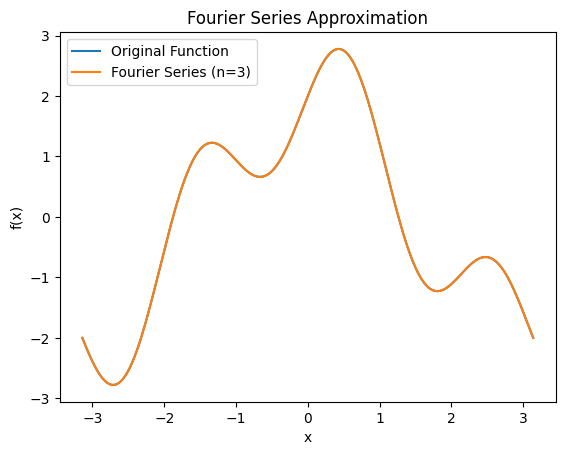

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Example usage:
def f(x):
    return np.sin(3 * x) + 2 * np.cos(x)

find_and_plot_fourier_series(f, 3)  # Plot for n = 3

## 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

A_0: 1.5707963268, B_0: 0.0000000000
A_1: 0.0000000000, B_1: 0.0000000000
A_2: -0.0000000000, B_2: -0.0000000000
A_3: -0.0000000000, B_3: 0.0000000000
A_4: 0.0000000000, B_4: -0.5000000000
A_5: 0.0000000000, B_5: -0.0000000000


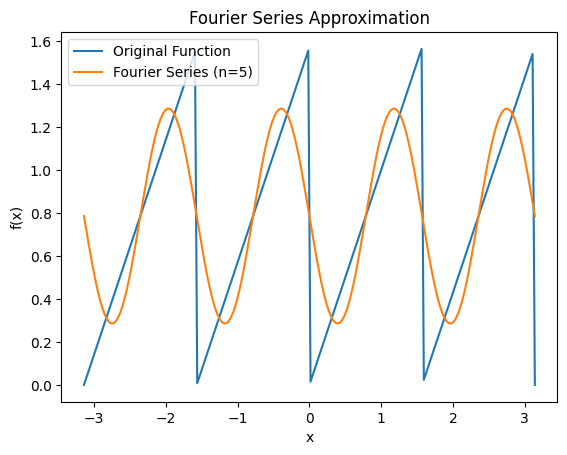

In [ ]:
find_and_plot_fourier_series(f, N)

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

A_0: 1.5707963268, B_0: 0.0000000000
A_1: 0.0000000000, B_1: 0.0000000000
A_2: -0.0000000000, B_2: -0.0000000000
A_3: -0.0000000000, B_3: 0.0000000000
A_4: 0.0000000000, B_4: -0.5000000000
A_5: 0.0000000000, B_5: -0.0000000000
A_6: -0.0000000000, B_6: -0.0000000000
A_7: -0.0000000000, B_7: 0.0000000000
A_8: -0.0000000000, B_8: -0.2500000000
A_9: 0.0000000000, B_9: 0.0000000000
A_10: -0.0000000000, B_10: -0.0000000000
A_11: -0.0000000000, B_11: 0.0000000000
A_12: -0.0000000000, B_12: -0.1666666667
A_13: 0.0000000000, B_13: -0.0000000000
A_14: -0.0000000000, B_14: -0.0000000000
A_15: 0.0000000000, B_15: 0.0000000000
A_16: -0.0000000000, B_16: -0.1250000000
A_17: 0.0000000000, B_17: 0.0000000000
A_18: -0.0000000000, B_18: 0.0000000000
A_19: 0.0000000000, B_19: 0.0000000000
A_20: -0.0000000000, B_20: -0.1000000000


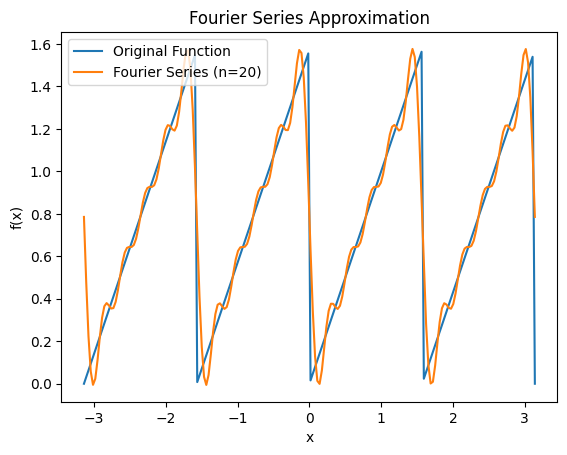

In [ ]:
find_and_plot_fourier_series(f, N)

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

A_0: 1.0000000000, B_0: 0.0000000000
A_1: 0.6366197724, B_1: 0.0000000000
A_2: 0.0000000000, B_2: 0.0000000000


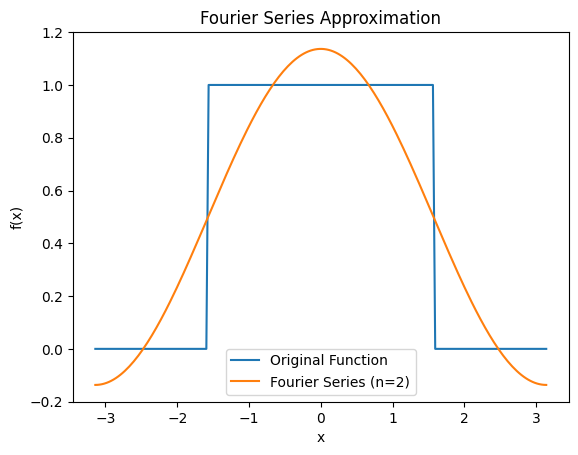

In [ ]:
find_and_plot_fourier_series(f, N)

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

A_0: 1.0000000000, B_0: 0.0000000000
A_1: 0.6366197724, B_1: 0.0000000000
A_2: 0.0000000000, B_2: 0.0000000000
A_3: -0.2122065908, B_3: 0.0000000000
A_4: 0.0000000000, B_4: 0.0000000000
A_5: 0.1273239545, B_5: 0.0000000000
A_6: -0.0000000000, B_6: 0.0000000000
A_7: -0.0909456818, B_7: 0.0000000000
A_8: -0.0000000000, B_8: 0.0000000000
A_9: 0.0707355303, B_9: 0.0000000000
A_10: 0.0000000000, B_10: 0.0000000000
A_11: -0.0578745248, B_11: 0.0000000000
A_12: -0.0000000000, B_12: 0.0000000000
A_13: 0.0489707517, B_13: 0.0000000000
A_14: -0.0000000000, B_14: 0.0000000000
A_15: -0.0424413182, B_15: 0.0000000000
A_16: -0.0000000000, B_16: 0.0000000000
A_17: 0.0374482219, B_17: 0.0000000000
A_18: 0.0000000000, B_18: 0.0000000000
A_19: -0.0335063038, B_19: 0.0000000000
A_20: -0.0000000000, B_20: 0.0000000000


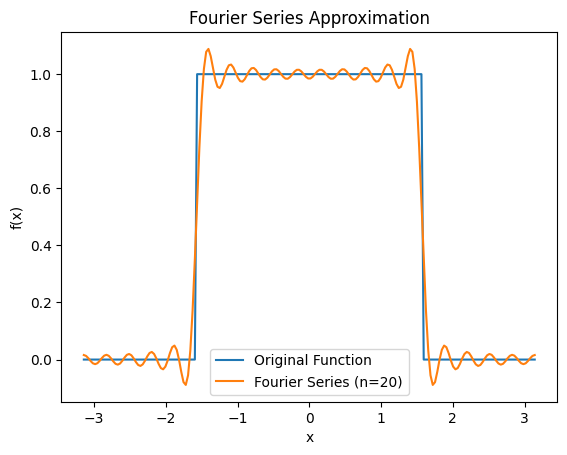

In [ ]:
find_and_plot_fourier_series(f, N)

# Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

What is $f(3^{-\frac{1}{2}})$? Why?

{answer}

From Gauss 2-point integration we know that
$$\begin{align}
\int_{-1}^1 f(x) dx = 3 &= f\bigg(-\frac{1}{\sqrt{3}}\bigg) + f\bigg(\frac{1}{\sqrt{3}}\bigg)\\
3 &= 1 + f\bigg(\frac{1}{\sqrt{3}}\bigg)\\
f\bigg(\frac{1}{\sqrt{3}}\bigg) &= 2
\end{align}$$